# TITANIC
This homework deals with the titanic competition on Kaggle. A little background on the competition is that this is a classification problem, which deals with the surviving probablity of the boarders of the titanic given some of their information. In class we have been learning about the different types of classification techniques that we can use. This is a great excercise for those clases!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew
import warnings
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
import re as re
import matplotlib.pyplot as plt
color = sns.color_palette()
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore warnings from SNS and SKLEARN
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
from subprocess import check_output
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, confusion_matrix, precision_score, recall_score

Let's import the Data and start exploring it. The first thing I will look out for are any of the missing values. 

In [2]:
train = pd.read_csv("/Users/J.Alvarez/OneDrive - BYU Office 365/Econ 213R/Titanic/train.csv")
test = pd.read_csv("/Users/J.Alvarez/OneDrive - BYU Office 365/Econ 213R/Titanic/test.csv")

In [3]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
#Length of the train dataset
train_len=len(train)
train_len

891

What jumps to my eyes, is that there are several variables that will not be as useful as others. Name for example, or Cabin, Fare or Where they embarked. They might be useful later one, we will have to check and see if they will pay off. If we were given them, there might be something we can extract out of them or use them to fill any of our missing data.

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [7]:
#Length of the train dataset
test_len=len(test)
test_len

418

In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000,0,0,240276,9.688,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.662,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.287,NaN,S


Since I am already looking at the data, lets get an idea for how many people actually survived, according to our dataset. It seems that there were more fatalities than survivors. Another reason why not to take a cruise!

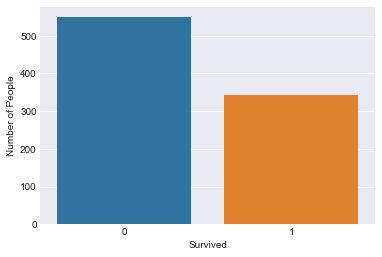

In [9]:
sns.countplot(train.Survived);
plt.xlabel('Survived');
plt.ylabel('Number of People');

At this point, I will start exploring the data a little further, and start filling some of the missing values. There is gret value in having a good TRAINING dataset.. in filling those missing values, I will use 2 formulas, both of which will fill values for either the train or test dataset. NOTE THAT I WILL FILL THE VALUES OF MY TEST USING MY TRAIN DATASET. This is a crucial point of the handling data portion.

In [10]:
master_data = train

In [11]:
master_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


This gives us an idea of how much data is missing. Note that this is only for our train Dataset!

In [12]:
all_missing_data = (master_data.isnull().sum() / len(master_data)) * 100
all_missing_data = all_missing_data.drop(all_missing_data[all_missing_data == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Percentage' :all_missing_data})
missing_data.head(20)

,Missing Percentage
Cabin,77.104
Age,19.865
Embarked,0.224


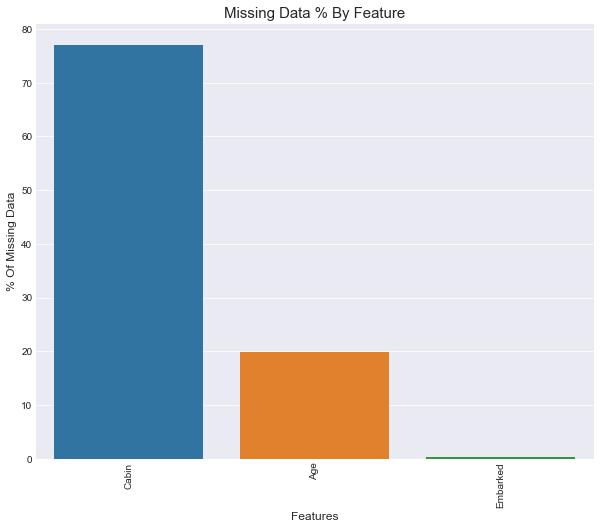

In [13]:
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='90')
sns.barplot(x=all_missing_data.index, y=all_missing_data)
plt.xlabel('Features', fontsize=12)
plt.ylabel('% Of Missing Data', fontsize=12)
plt.title('Missing Data % By Feature', fontsize=15)
params = {'legend.fontsize': 12}
plt.rcParams.update(params)

In the high scale analysis, there are 2 variables that I am interested in exploring a little further. Those are the Fare prices and the Age. I decided to look at the fare Prices, because those prices bring a lot of other variable with them; such as how high class the passenger is, whether he is an important person, or of less importance (all the same unto God, though!), etc. 

Age I find more relevant than sex, because this will tell give me a better idea of who is getting saved, since i already know that "ladies first" (first to be saved in this case), assuming people were polite and lived the way that leo DiCaprio lived his life..(even though both fitted there!!)

In looking at these variables I am focusing on the following:

Distribuition and density of the variable accross passengers, Averages, and probably the coolest graph is the density | that they survived/not survived. 

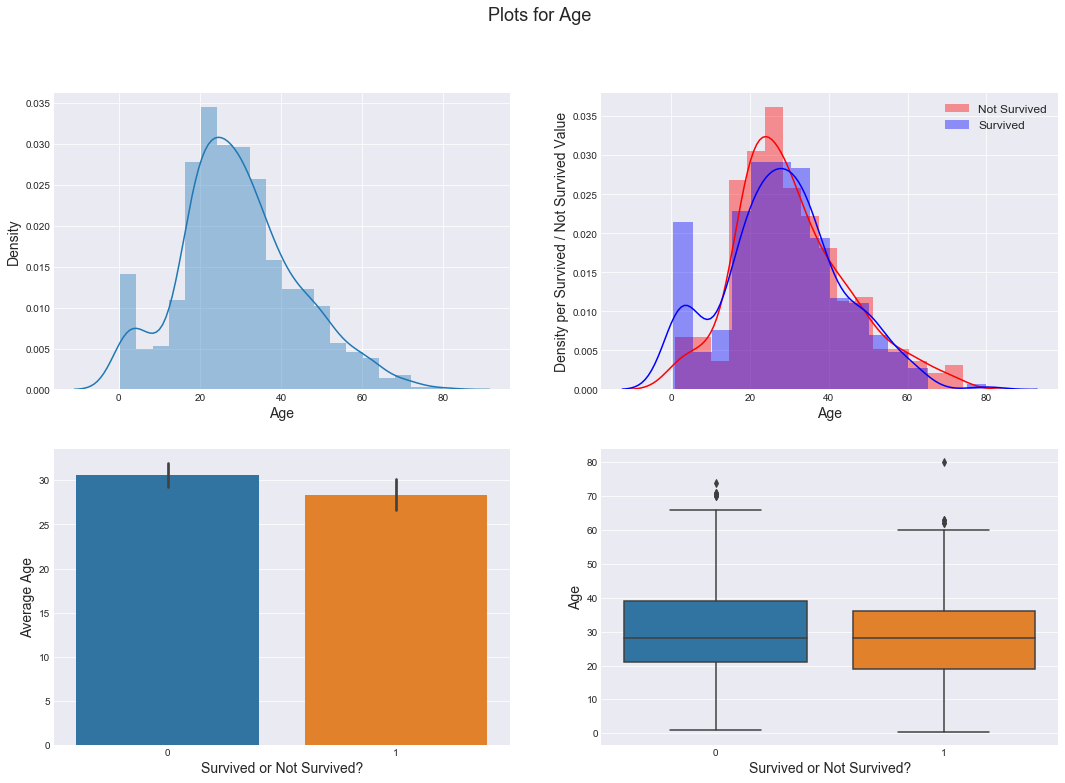

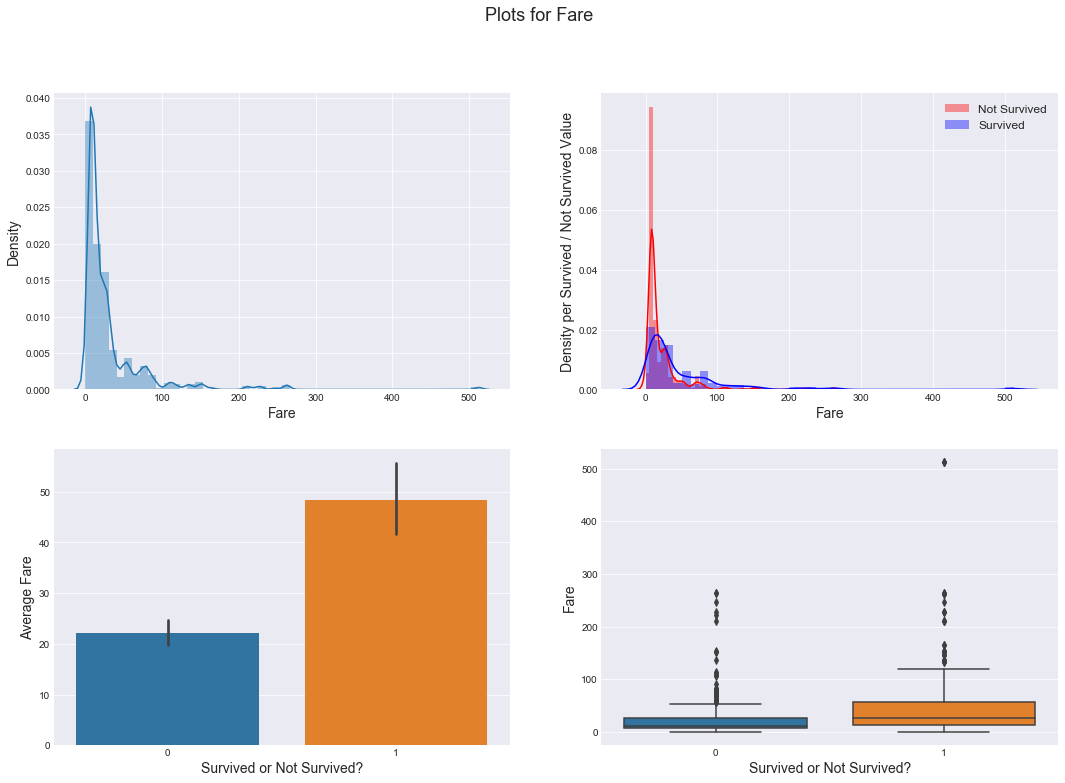

In [14]:
numeric_features = ['Age', 'Fare']
### Plotting Numeric Features
# Looping through and Plotting Numeric features
for column in numeric_features:    
    # Figure initiation
    fig = plt.figure(figsize=(18,12))
    
    ### Distribution plot
    sns.distplot(train[column].dropna(), ax=plt.subplot(221));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Density', fontsize=14);
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for '+column, fontsize=18);
    
    ### Distribution per Survived / Not Survived Value
    # Not Survived hist
    sns.distplot(train.loc[train.Survived==0, column].dropna(),
                 color='red', label='Not Survived', ax=plt.subplot(222));
    # Survived hist
    sns.distplot(train.loc[train.Survived==1, column].dropna(),
                 color='blue', label='Survived', ax=plt.subplot(222));
    # Adding Legend
    plt.legend(loc='best')
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Density per Survived / Not Survived Value', fontsize=14);
    
    ### Average Column value per Survived / Not Survived Value
    sns.barplot(x="Survived", y=column, data=train, ax=plt.subplot(223));
    # X-axis Label
    plt.xlabel('Survived or Not Survived?', fontsize=14);
    # Y-axis Label
    plt.ylabel('Average ' + column, fontsize=14);
    
    ### Boxplot of Column per Survived / Not Survived Value
    sns.boxplot(x="Survived", y=column, data=train, ax=plt.subplot(224));
    # X-axis Label
    plt.xlabel('Survived or Not Survived?', fontsize=14);
    # Y-axis Label
    plt.ylabel(column, fontsize=14);
    # Printing Chart
    plt.show()

## Filling the missing values: Fare, Embarked. 


### FARE:


In [15]:
def test_declariation(column, value):
    test.loc[test[column].isnull(),column] = value
def train_declariation(column, value):
    master_data.loc[master_data[column].isnull(),column] = value

In [16]:
train_declariation("Fare",train['Fare'].median())
test_declariation("Fare",train['Fare'].median())

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Embarked

In [18]:
train_declariation('Embarked','S')

For now.. i will change this values to have the mean of the whole dataset (train) but this is a temporary fix.. since there might be more information to be obraint through the titles.. so I will do thisnat the end.. (UPDATE: ran out of time.. it would be interesting to use the title or the fare price to try to predict the age)

In [19]:
sum((master_data['Age'].isnull()))

177

In [20]:
sum((test['Age'].isnull()))

86

In [21]:
test_declariation("Age",train['Age'].median())
train_declariation("Age",train['Age'].median())

In [22]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [23]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Cabin
Since looking at it at from an outsiders perspective, I thought that cabin would not be such a great predictor, since most people might not have been at their cabin at the time of sinking. While cabin could tell me whether they were important or if they were in a suite or a higher class, i hope to catch most of that through the fare price in features engineering coming below.

# Feature Engineering
Let's Take this to the next level!
I will dive into some categories and try to make them fit to waht we learn in class. To the simpliest of ways, just put things into categories easy to read and to put in boxes, instead of having a colum with hundreds of different values, standarizing and making it wasy for the categorization!

## Family from SIBSP and PARCH

Since I have variables that tell me the # of sibling and the parents, I decided to combine those and make a famliy varibale. Also, with this information I can make a Single varible, which would tell me whether someone was by himself on the Titanic (how sad, foreveralone)

In [24]:
features_data = pd.concat(objs=[master_data, test], axis=0).reset_index(drop=True)

In [25]:
features_data["Family"] = features_data['SibSp'] + features_data['Parch'] + 1

In [26]:
features_data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Family
count,1309.000,1309.000,1309.000,1309.000,1309.000,1309.000,891.000,1309.000
mean,29.503,33.281,0.385,655.000,2.295,0.499,0.384,1.884
std,12.905,51.741,0.866,378.020,0.838,1.042,0.487,1.584
min,0.170,0.000,0.000,1.000,1.000,0.000,0.000,1.000
25%,22.000,7.896,0.000,328.000,2.000,0.000,0.000,1.000
50%,28.000,14.454,0.000,655.000,3.000,0.000,0.000,1.000
75%,35.000,31.275,0.000,982.000,3.000,1.000,1.000,2.000
max,80.000,512.329,9.000,1309.000,3.000,8.000,1.000,11.000


In [27]:
print (features_data[['Family', 'Survived']].groupby(['Family'], as_index=False).mean())

   Family  Survived
0       1     0.304
1       2     0.553
2       3     0.578
3       4     0.724
4       5     0.200
5       6     0.136
6       7     0.333
7       8     0.000
8      11     0.000


In [28]:
features_data.drop(labels=["Parch"],axis = 1,inplace=True)
features_data.drop(labels=["SibSp"],axis = 1,inplace=True)
features_data.drop(labels=["Cabin"],axis = 1,inplace=True)

## Gender as boolean

simply turn our males and females into numbers, note that there are only 2 possible values.

In [29]:
features_data.replace('male', 0, inplace=True)
features_data.replace('female', 1, inplace=True)

In [30]:
features_data[["Family", "Survived"]].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family,Survived
3,4,0.724
2,3,0.578
1,2,0.553
6,7,0.333
0,1,0.304
4,5,0.200
5,6,0.136
7,8,0.000
8,11,0.000


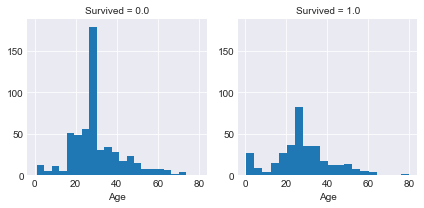

In [31]:
g = sns.FacetGrid(features_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

## Captain, Oh Captain

Titles used to be a bigger deal back then (don't tell that to your professor), so with the aid of a kernel (SIN, big shoutout to you!) i extracted a fomula that extracts the titles themselves! So this proved to be incredibly useful in turning a not so useful vairable  into a much more useful variable.

In [32]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
        return ""

In [33]:
features_data['Title'] = features_data['Name'].apply(get_title)

In [34]:
print(pd.crosstab(features_data['Title'], features_data['Sex']))

Sex         0    1
Title             
Capt        1    0
Col         4    0
Countess    0    1
Don         1    0
Dona        0    1
Dr          7    1
Jonkheer    1    0
Lady        0    1
Major       2    0
Master     61    0
Miss        0  260
Mlle        0    2
Mme         0    1
Mr        757    0
Mrs         0  197
Ms          0    2
Rev         8    0
Sir         1    0


In [35]:
# putting the titles under similar umbrelas so we can use them as a categorical variable!

features_data['Title'] = features_data['Title'].replace('Mlle', 'Miss')
features_data['Title'] = features_data['Title'].replace('Ms', 'Miss')
features_data['Title'] = features_data['Title'].replace('Mme', 'Mrs')
features_data['Title'] = features_data['Title'].replace('Lady', 'Other')
features_data['Title'] = features_data['Title'].replace('Countess', 'Other')
features_data['Title'] = features_data['Title'].replace('Capt', 'Other')
features_data['Title'] = features_data['Title'].replace('Col', 'Other')
features_data['Title'] = features_data['Title'].replace('Don', 'Other')
features_data['Title'] = features_data['Title'].replace('Dr', 'Other')
features_data['Title'] = features_data['Title'].replace('Major', 'Other')
features_data['Title'] = features_data['Title'].replace('Rev', 'Other')
features_data['Title'] = features_data['Title'].replace('Sir', 'Other')
features_data['Title'] = features_data['Title'].replace('Jonkheer', 'Other')
features_data['Title'] = features_data['Title'].replace('Dona', 'Other')

In [36]:
print(pd.crosstab(features_data['Title'], features_data['Sex']))

Sex       0    1
Title           
Master   61    0
Miss      0  264
Mr      757    0
Mrs       0  198
Other    25    4


In [37]:
# Numbers, not titles.. 
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
features_data['Title'] = features_data['Title'].map(title_mapping)
#features_data['Title'] = features_data['Title'].fillna(0)

In [38]:
features_data.drop(labels=["Name"],axis = 1,inplace=True)

In [39]:
features_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Title', ascending=True)

,Title,Survived
0,1,0.157
1,2,0.703
2,3,0.794
3,4,0.575
4,5,0.348


### Fare quantiles partitioning

How much did you pay for your ticket?

For simplicity, I made 5 quantiles and then turned them into 5 different categories!

In [40]:
features_data['FareBand'] = pd.qcut(features_data['Fare'], 5)
features_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.854]",0.218
1,"(7.854, 10.5]",0.201
2,"(10.5, 21.558]",0.427
3,"(21.558, 41.579]",0.443
4,"(41.579, 512.329]",0.645


In [41]:
features_data.loc[features_data['Fare'] <= 7.854, 'Fare'] = 0
features_data.loc[(features_data['Fare'] > 7.854)  & (features_data['Fare'] <= 10.5), 'Fare'] = 1
features_data.loc[(features_data['Fare'] > 10.5) & (features_data['Fare'] <= 21.55), 'Fare']   = 2
features_data.loc[(features_data['Fare'] > 21.55) & (features_data['Fare'] <= 41.57), 'Fare']   = 3
features_data.loc[ features_data['Fare'] > 41.57, 'Fare'] = 4
features_data['Fare'] = features_data['Fare'].astype(int)

In [42]:
features_data[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean().sort_values(by='Fare', ascending=True)

,Fare,Survived
0,0,0.217
1,1,0.203
2,2,0.427
3,3,0.440
4,4,0.646


In [43]:
features_data.drop(labels=["FareBand"],axis = 1,inplace=True)

In [44]:
features_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
Age            1309 non-null float64
Embarked       1309 non-null object
Fare           1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Family         1309 non-null int64
Title          1309 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 102.3+ KB


### Where are you coming from?

Same story here, turned the embarked into a categorical variable!

In [45]:
features_data['Embarked'] = features_data['Embarked'].map( {'S':0, 'C':1, 'Q':2} ).astype(int)

In [46]:
features_data.describe()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Family,Title
count,1309.000,1309.000,1309.000,1309.000,1309.000,1309.000,891.000,1309.000,1309.000
mean,29.503,0.394,2.003,655.000,2.295,0.356,0.384,1.884,1.733
std,12.905,0.653,1.411,378.020,0.838,0.479,0.487,1.584,1.022
min,0.170,0.000,0.000,1.000,1.000,0.000,0.000,1.000,1.000
25%,22.000,0.000,1.000,328.000,2.000,0.000,0.000,1.000,1.000
50%,28.000,0.000,2.000,655.000,3.000,0.000,0.000,1.000,1.000
75%,35.000,1.000,3.000,982.000,3.000,1.000,1.000,2.000,2.000
max,80.000,2.000,4.000,1309.000,3.000,1.000,1.000,11.000,5.000


In [47]:
features_data['ForeverAlone'] = 0

In [48]:
features_data.loc[features_data['Family'] == 1, 'ForeverAlone'] = 1

In [49]:
print (features_data[['ForeverAlone', 'Survived']].groupby(['ForeverAlone'], as_index=False).mean())

   ForeverAlone  Survived
0             0     0.506
1             1     0.304


In [50]:
features_data.drop(labels=["PassengerId"],axis = 1,inplace=True)

In [51]:
features_data.drop(labels=["Ticket"],axis = 1,inplace=True)

## UNTO THE NEXT ONE!
Now we can look at solving some of life mysteries and making ourselves useful in using some good models.
I used a library to split the train into a train and a test and then used that to train the models. I extracted some useful information from Sian's kernel in Kaggle. This allowed me to try several models at once, and then choose one to predict the values!


What is nice about classifiers is that they do not require as much tunning, since most tunning goes with the data that you are using. In this case what I did, was to try all of them "at once" and see how they performed against each other. big part of the classifiers is to use the different metrics of measures that we learned in class. Sadly I ran out of time to do those, but I think (and from working from a classmate on the project) it would yield great deal of information to have each one of the different measures and have compare the models to see what each of the models are yielding and compare them accross different measures as they might perform in different ways and some might be more useful for certain types of scenarios.

In [52]:
#Separate train dataset and test dataset
train = features_data[:train_len]
test = features_data[train_len:]

In [53]:
train['Survived'] = train['Survived'].astype(int)

In [54]:
train = train[['Survived','Sex','Age', 'Embarked','ForeverAlone','Title']]
test = test[['Survived','Sex','Age', 'Embarked','ForeverAlone','Title']]

In [55]:
train['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)

In [56]:
print (train.head(10))

   Survived  Sex  Age  Embarked  ForeverAlone  Title
0         0    0   22         0             0      1
1         1    1   38         1             0      3
2         1    1   26         0             1      2
3         1    1   35         0             0      3
4         0    0   35         0             1      1
5         0    0   28         2             1      1
6         0    0   54         0             1      1
7         0    0    2         0             0      4
8         1    1   27         0             0      3
9         1    1   14         1             0      3


In [57]:

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

In [58]:
X = train.iloc[0::, 1::]
y = train.iloc[0::, 0]
acc_dict = {}

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [60]:
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

In [61]:
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

In [62]:
#X_train, X_test = X[train_index], X[test_index]

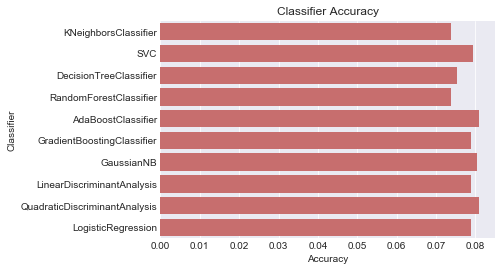

In [63]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="r")

In [64]:
candidate_classifier = SVC()
candidate_classifier.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
test.drop(labels=["Survived"],axis = 1,inplace=True)

In [66]:
result = candidate_classifier.predict(test)

In [67]:
sub = pd.DataFrame()
sub['Survived'] = result
sub.to_csv('submission.csv',index=False)

Thanks to this assignment I feel much more competent using classifiers in Python!